In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
from skimage.metrics import peak_signal_noise_ratio
from skimage.metrics import structural_similarity
from sklearn.metrics import mean_squared_error 

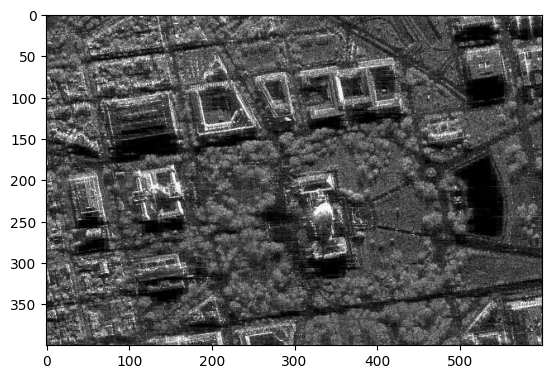

In [2]:
img = cv2.imread('sar_1_gray.jpg', cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap='gray')

In [3]:
img.shape # h,w,c

(400, 600)

Text(0, 0.5, 'Вероятность пикселя')

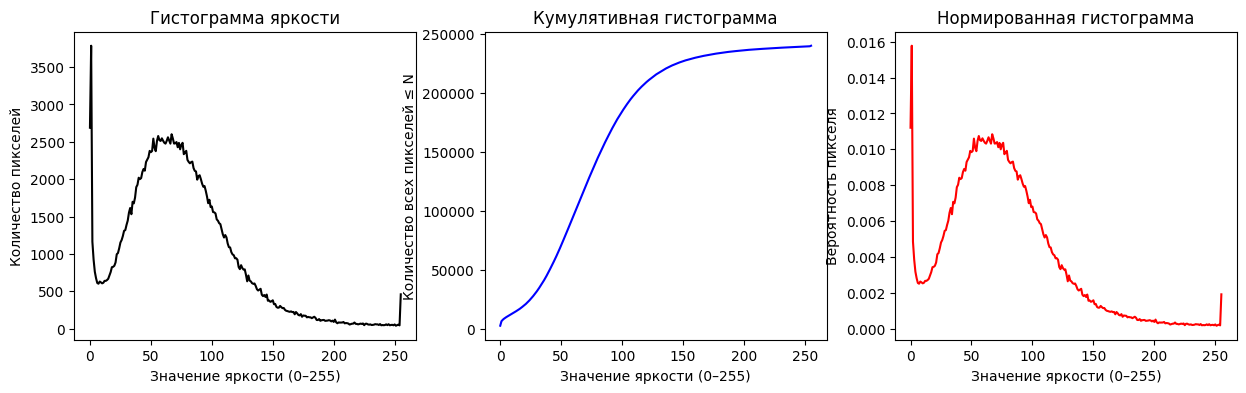

In [4]:
# 2. Гистограмма
hist = cv2.calcHist([img], [0], None, [256], [0, 256])

# 1) Обычная гистограмма
plt.figure(figsize=(15,4))
plt.subplot(1,3,1)
plt.plot(hist, color='black')
plt.title("Гистограмма яркости")
plt.xlabel("Значение яркости (0–255)")
plt.ylabel("Количество пикселей")

# 2) Кумулятивная гистограмма
hist_cum = hist.cumsum()
plt.subplot(1,3,2)
plt.plot(hist_cum, color='blue')
plt.title("Кумулятивная гистограмма")
plt.xlabel("Значение яркости (0–255)")
plt.ylabel("Количество всех пикселей ≤ N")

# 3) Нормированная гистограмма
hist_norm = hist / hist.sum()
plt.subplot(1,3,3)
plt.plot(hist_norm, color='red')
plt.title("Нормированная гистограмма")
plt.xlabel("Значение яркости (0–255)")
plt.ylabel("Вероятность пикселя")

(<Axes: title={'center': 'Gamma 1.5 (>1)'}>,
 Text(0.5, 1.0, 'Gamma 1.5 (>1)'))

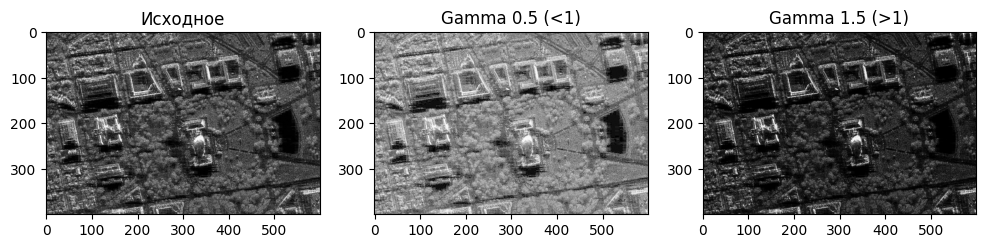

In [5]:
# 3. Гамма-коррекция
def gamma_correction(image, gamma):
    img_norm = image / 255.0
    corrected = np.power(img_norm, gamma) * 255
    return corrected.astype(np.uint8)

gamma_low = gamma_correction(img, 0.5)
gamma_high = gamma_correction(img, 1.5)

plt.figure(figsize=(12,4))
plt.subplot(1,3,1), plt.imshow(img, cmap='gray'), plt.title("Исходное")
plt.subplot(1,3,2), plt.imshow(gamma_low, cmap='gray'), plt.title("Gamma 0.5 (<1)")
plt.subplot(1,3,3), plt.imshow(gamma_high, cmap='gray'), plt.title("Gamma 1.5 (>1)")

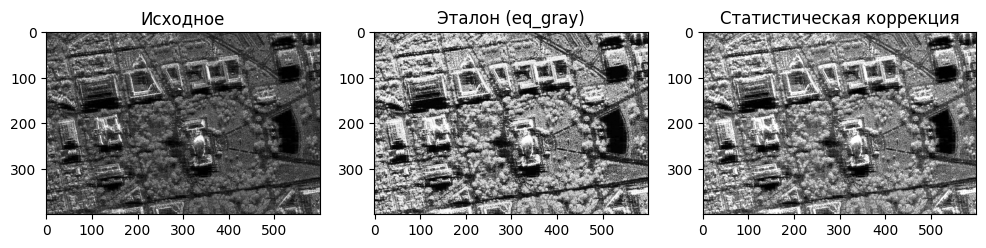

In [6]:
# 4. Статистическая коррекция
def statistical_correction(src, ref):
    mean_src, std_src = cv2.meanStdDev(src)
    mean_ref, std_ref = cv2.meanStdDev(ref)
    corrected = (src - mean_src[0][0]) / (std_src[0][0] + 1e-8)
    corrected = corrected * std_ref[0][0] + mean_ref[0][0]
    corrected = np.clip(corrected, 0, 255).astype(np.uint8)
    return corrected

eq_gray = cv2.equalizeHist(img)
stat_corr = statistical_correction(img, eq_gray)

plt.figure(figsize=(12,4))
plt.subplot(1,3,1), plt.imshow(img, cmap='gray'), plt.title("Исходное")
plt.subplot(1,3,2), plt.imshow(eq_gray, cmap='gray'), plt.title("Эталон (eq_gray)")
plt.subplot(1,3,3), plt.imshow(stat_corr, cmap='gray'), plt.title("Статистическая коррекция")
plt.show()

In [7]:
# 5. Метрики качества
mse_stat = mean_squared_error(eq_gray, stat_corr)
ssim_stat = structural_similarity(eq_gray, stat_corr)
print("Stat Correction: MSE =", mse_stat, "SSIM =", ssim_stat)

mse_low = mean_squared_error(img, gamma_low)
ssim_low = structural_similarity(img, gamma_low)
print("Gamma <1: MSE =", mse_low, "SSIM =", ssim_low)

mse_high = mean_squared_error(img, gamma_high)
ssim_high = structural_similarity(img, gamma_high)
print("Gamma >1: MSE =", mse_high, "SSIM =", ssim_high)

Stat Correction: MSE = 247.7010208333333 SSIM = 0.9500070636130857
Gamma <1: MSE = 3250.429145833333 SSIM = 0.7875008686792753
Gamma >1: MSE = 971.8206541666668 SSIM = 0.8065788107754002


(<Axes: title={'center': 'THRESH_TOZERO_INV'}>,
 Text(0.5, 1.0, 'THRESH_TOZERO_INV'))

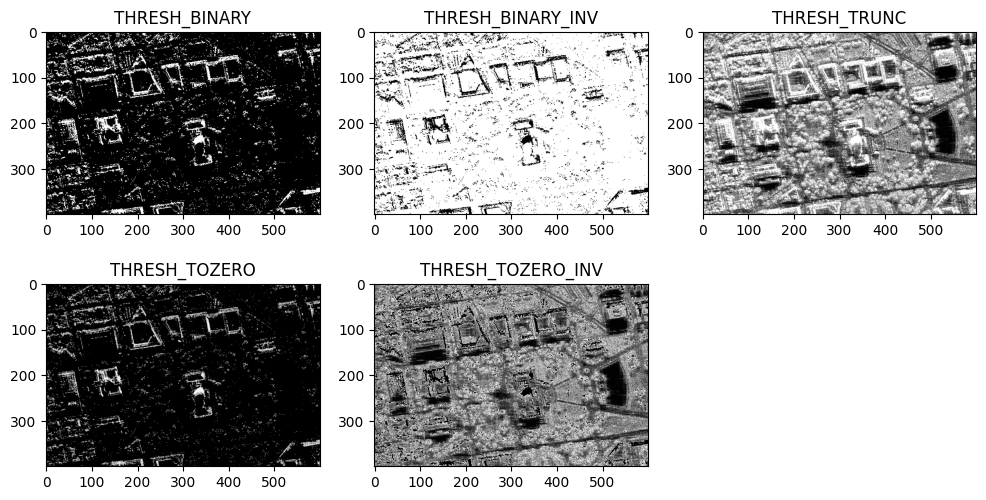

In [8]:
_, t1 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
_, t2 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV)
_, t3 = cv2.threshold(img, 127, 255, cv2.THRESH_TRUNC)
_, t4 = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO)
_, t5 = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO_INV)

plt.figure(figsize=(12,6))
plt.subplot(2,3,1), plt.imshow(t1, cmap='gray'), plt.title("THRESH_BINARY")
plt.subplot(2,3,2), plt.imshow(t2, cmap='gray'), plt.title("THRESH_BINARY_INV")
plt.subplot(2,3,3), plt.imshow(t3, cmap='gray'), plt.title("THRESH_TRUNC")
plt.subplot(2,3,4), plt.imshow(t4, cmap='gray'), plt.title("THRESH_TOZERO")
plt.subplot(2,3,5), plt.imshow(t5, cmap='gray'), plt.title("THRESH_TOZERO_INV")